# **Feature Extraction using ORB & SIFT: Image Keypoints**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

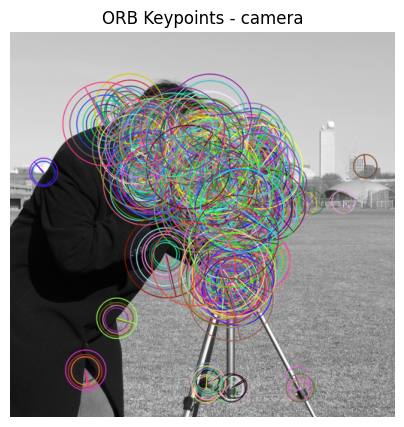

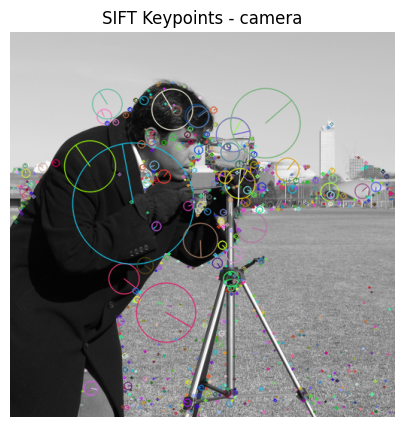

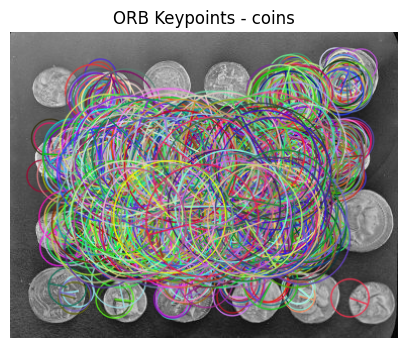

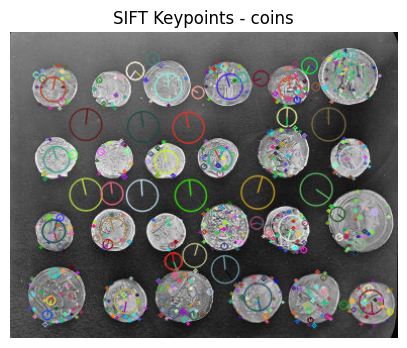

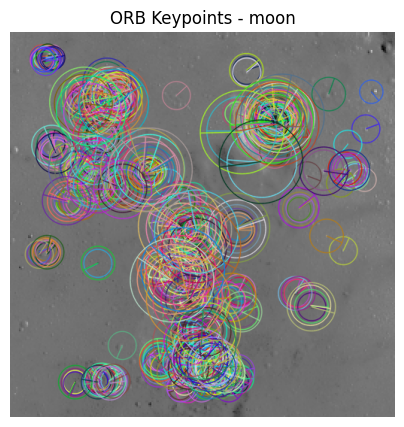

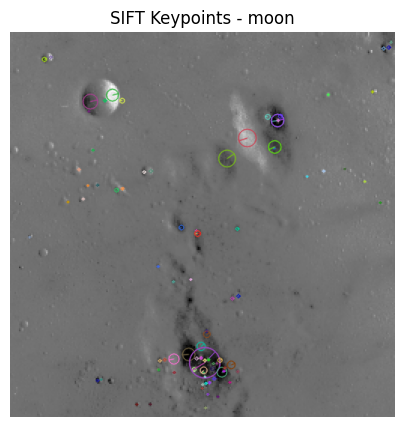

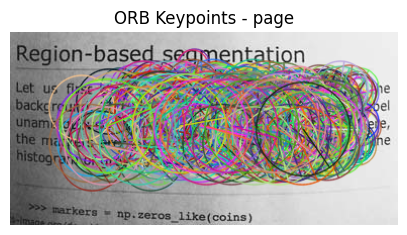

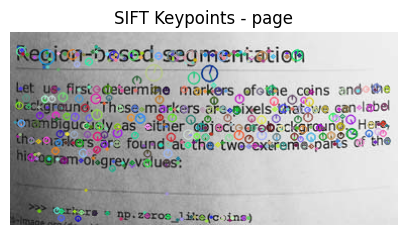

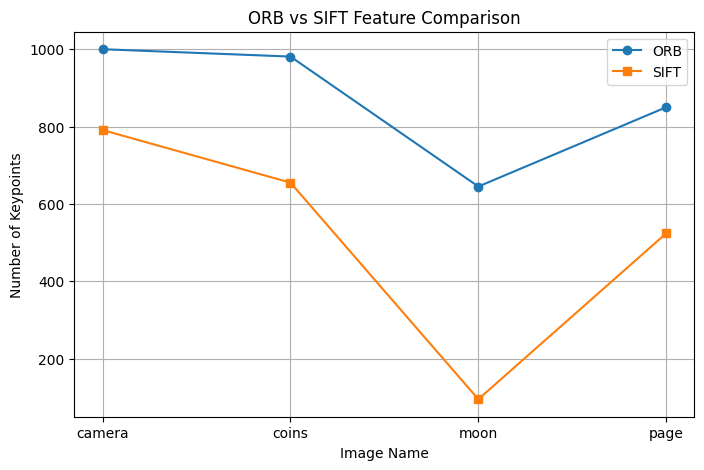

In [2]:
# Install OpenCV with SIFT support
!pip install opencv-contrib-python

# Import libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data
from google.colab import files

# Load sample images from skimage
images = {
    "camera": data.camera(),
    "coins": data.coins(),
    "moon": data.moon(),
    "page": data.page()
}

# Convert to grayscale if needed
for key in images:
    if len(images[key].shape) == 3:
        images[key] = cv2.cvtColor(images[key], cv2.COLOR_BGR2GRAY)

# Create CSV
df = pd.DataFrame({
    "image_name": list(images.keys())
})

# Save CSV
csv_path = "image_dataset.csv"
df.to_csv(csv_path, index=False)

# Download CSV
files.download(csv_path)

df

orb = cv2.ORB_create(nfeatures=1000)
sift = cv2.SIFT_create()

results = []

for name, img in images.items():
    kp_orb, des_orb = orb.detectAndCompute(img, None)
    kp_sift, des_sift = sift.detectAndCompute(img, None)

    results.append({
        "Image": name,
        "ORB_Keypoints": len(kp_orb),
        "SIFT_Keypoints": len(kp_sift)
    })

result_df = pd.DataFrame(results)
result_df

def draw_keypoints(image, keypoints, title):
    img_kp = cv2.drawKeypoints(
        image, keypoints, None,
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    plt.figure(figsize=(5,5))
    plt.imshow(img_kp, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

for name, img in images.items():
    kp_orb, _ = orb.detectAndCompute(img, None)
    kp_sift, _ = sift.detectAndCompute(img, None)

    draw_keypoints(img, kp_orb, f"ORB Keypoints - {name}")
    draw_keypoints(img, kp_sift, f"SIFT Keypoints - {name}")

plt.figure(figsize=(8,5))
plt.plot(result_df["Image"], result_df["ORB_Keypoints"], marker='o', label="ORB")
plt.plot(result_df["Image"], result_df["SIFT_Keypoints"], marker='s', label="SIFT")
plt.xlabel("Image Name")
plt.ylabel("Number of Keypoints")
plt.title("ORB vs SIFT Feature Comparison")
plt.legend()
plt.grid()
plt.show()
